In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from main import getMyPosition as getMyPosition

prices = pd.read_csv('prices.txt', delimiter='\s+', header=None)
prices

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gm/gd_vt5l11dv_906sjwrpshkh0000gn/T/ipykernel_74224/4069855158.py:7: SyntaxWarning: invalid escape sequence '\s'
  prices = pd.read_csv('prices.txt', delimiter='\s+', header=None)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,...,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
746,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,...,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
747,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,...,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
748,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,...,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


# Time Series Dist

/var/folders/gm/gd_vt5l11dv_906sjwrpshkh0000gn/T/ipykernel_74224/2517030877.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


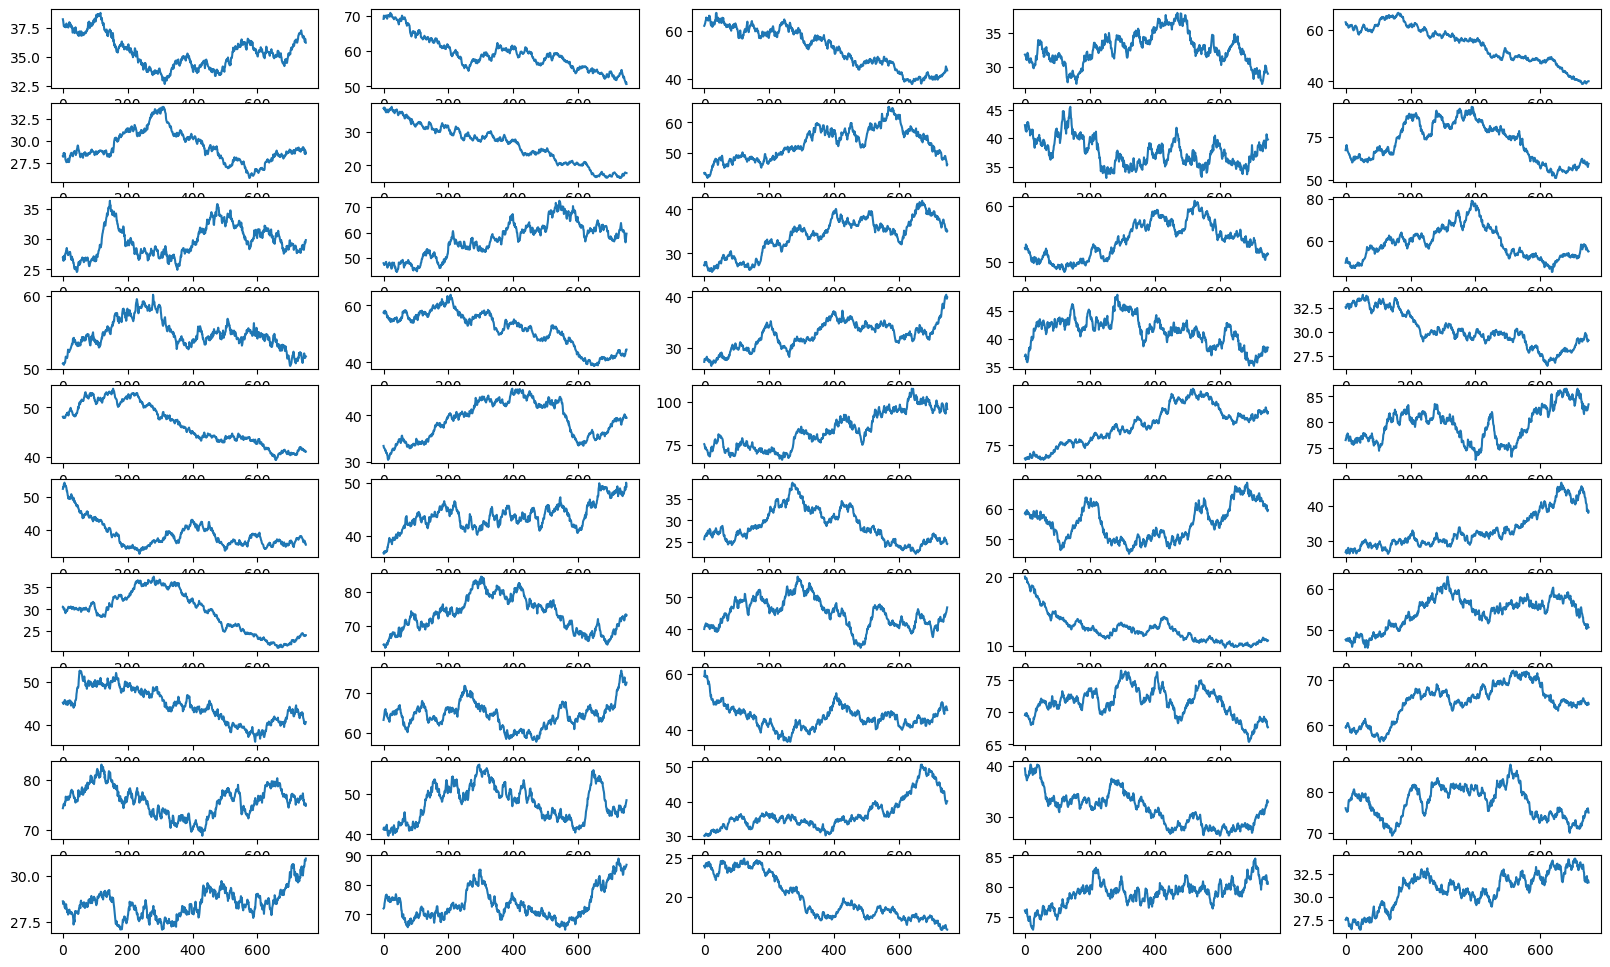

In [10]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(20,12))

for i in range(10):
    for j in range(5):
        axs[i, j].plot(prices[i * 5 + j])

fig.show()

# Correlation Dists

In [13]:
from sklearn.model_selection import train_test_split

prices_train, prices_test = train_test_split(prices, test_size=1/3, shuffle=False)

print(f"Training size: {prices_train.shape[0]}\nTesting sie: {prices_test.shape[0]}")

Training size: 500
Testing sie: 250


# Comparing Splits

/var/folders/gm/gd_vt5l11dv_906sjwrpshkh0000gn/T/ipykernel_74224/4287352053.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


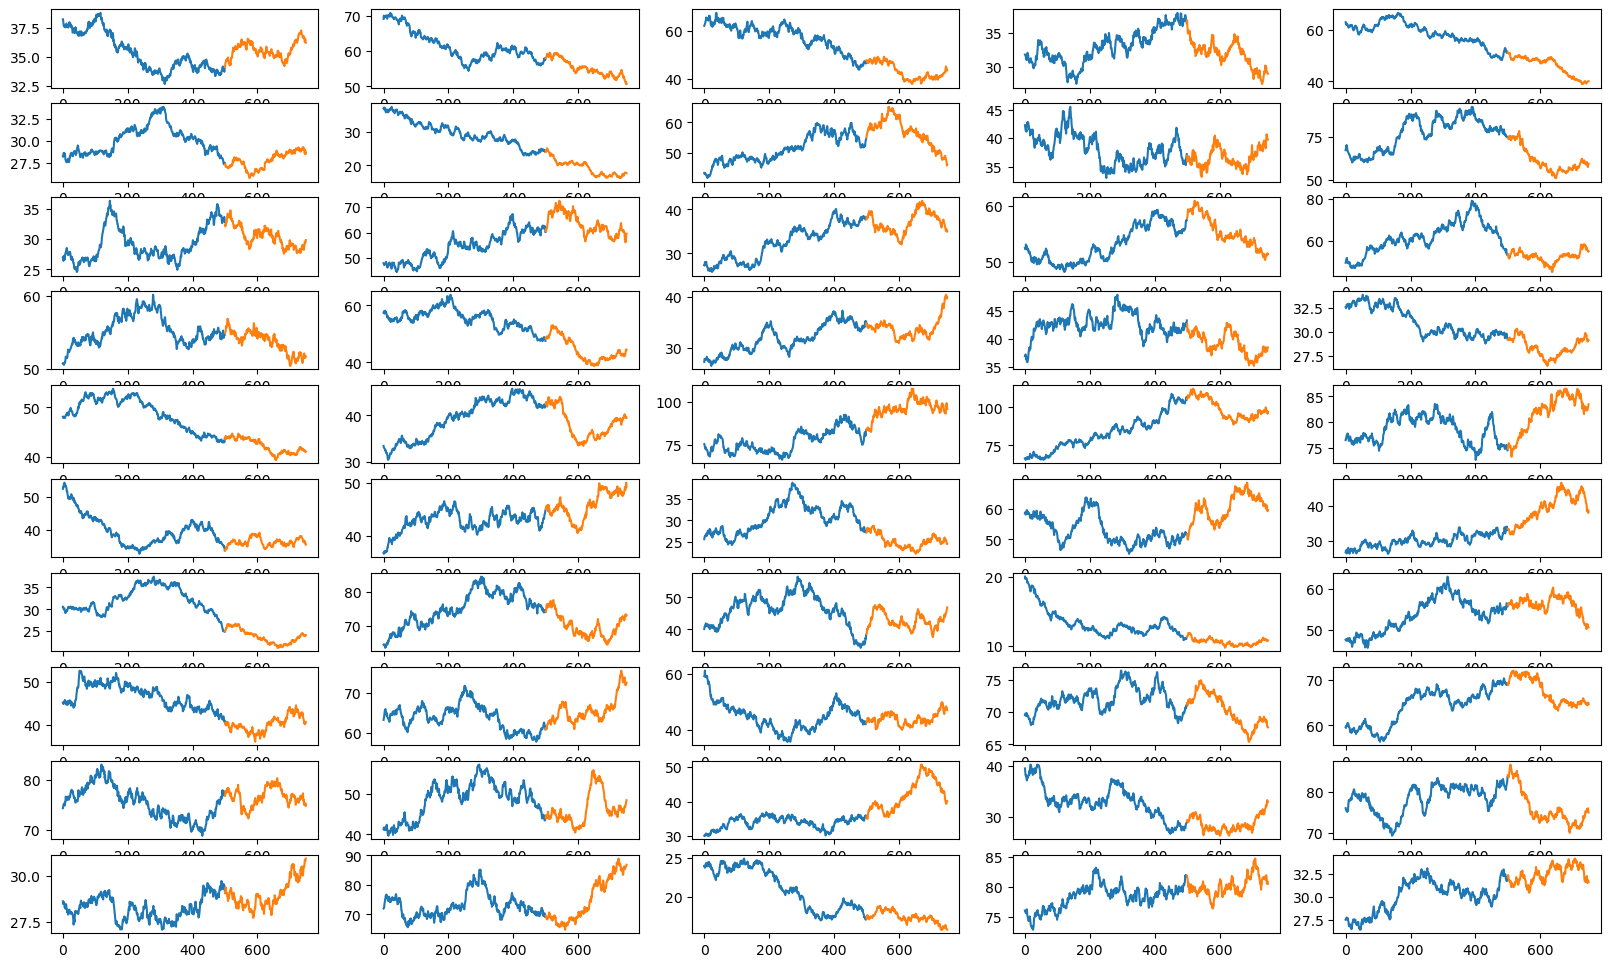

In [14]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(20,12))

for i in range(10):
    for j in range(5):
        axs[i, j].plot(prices_train[i * 5 + j])
        axs[i, j].plot(prices_test[i * 5 + j])

fig.show()

# Correlation Between Stocks

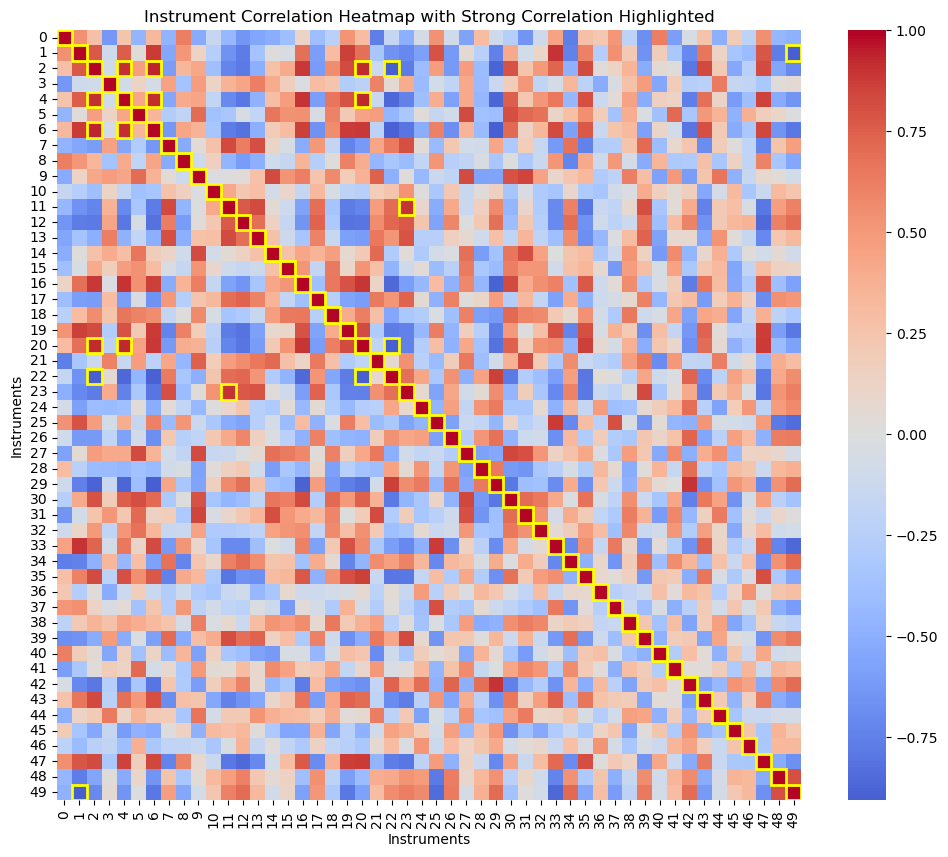

In [ ]:
correlation_matrix = prices.corr()
strong_corr = (correlation_matrix > 0.9) | (correlation_matrix < -0.9)

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0, cbar=True)

# Adding borders to correlation > 0.9
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if strong_corr.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))

plt.title('Instrument Correlation Heatmap with Strong Correlation Highlighted')
plt.xlabel('Instruments')
plt.ylabel('Instruments')
plt.show()

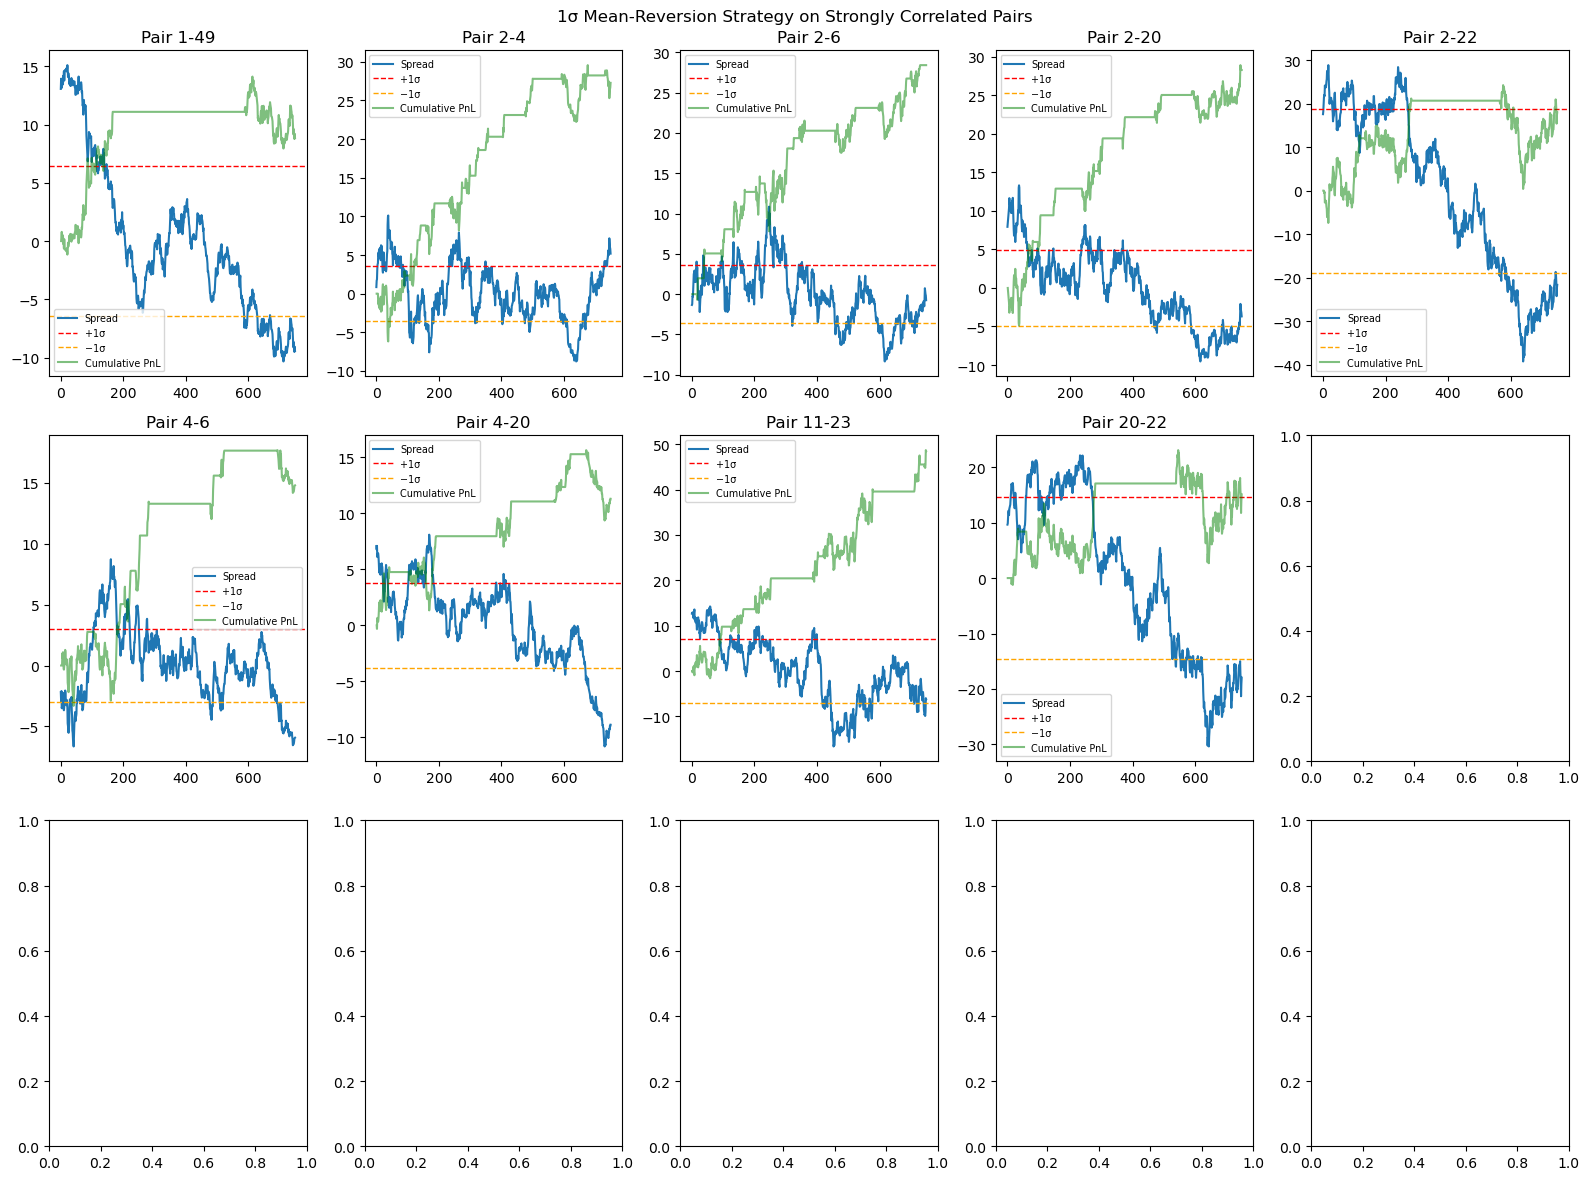

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(16, 12))
nr = 0
nc = 0

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix[i][j]) > 0.9:
            spread = prices[i] - prices[j]
            spread -= spread.mean()
            std = spread.std()

            # Use pandas Series to enable .shift()
            pos = pd.Series(np.zeros(len(spread)))

            for t in range(1, len(spread)):
                if spread[t - 1] < -std:
                    pos[t] = 1  # Long spread
                elif spread[t - 1] > std:
                    pos[t] = -1  # Short spread
                elif abs(spread[t - 1]) < 0.5 * std:
                    pos[t] = 0  # Exit position
                else:
                    pos[t] = pos[t - 1]  # Hold previous position

            ret = (prices[i].diff() - prices[j].diff()) * pos.shift(1)
            cum_pnl = ret.cumsum()

            axs[nr, nc].plot(spread, label='Spread')
            axs[nr, nc].axhline(std, color='red', linestyle='dashed', linewidth=1, label='+1σ')
            axs[nr, nc].axhline(-std, color='orange', linestyle='dashed', linewidth=1, label='−1σ')
            axs[nr, nc].plot(cum_pnl, color='green', alpha=0.5, label='Cumulative PnL')
            axs[nr, nc].set_title(f"Pair {i}-{j}")
            axs[nr, nc].legend(fontsize='x-small')

            if nc == 4:
                nc = 0
                nr += 1
            else:
                nc += 1

            if nr == 3:
                break
    if nr == 3:
        break

fig.suptitle("1σ Mean-Reversion Strategy on Strongly Correlated Pairs")
plt.tight_layout()
plt.show()
